<a href="https://colab.research.google.com/github/Vackam/2022_unix_github_start/blob/master/HW07_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Code for Q1
For the given dataset in the following code, perform a (multi-variable) linear regression to answer to the questions in HW07

*Do not change train_data and test_data*

In [19]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/inetguru/IDS-CB35533/main/diabetes.csv')

train_data = data[:420]
test_data = data[421:442]
print(train_data.head())

predictors = ['BMI', 'BP']
target = 'Y'

X_test = test_data[predictors]
y_test = test_data[target]
# Set predictors and target
X = train_data[predictors]
y = train_data[target]
# Generate a model instance for linear regression
Model = linear_model.LinearRegression()
# Perform Fit/Train, Check/print out the coefficients of your model
Model.fit(X.values,y)
print(f'Model intercept = {Model.intercept_}, Model coef = {Model.coef_}')
# Evaluate the model using the test data, Get r2 score.
y_pred = Model.predict(X_test.values)
print('MSE =', metrics.mean_squared_error(y_test, y_pred))
print('R2 Score =', metrics.r2_score(test_data[['Y']], y_pred))

test_pred = Model.predict([[30.5, 100.0]])
print(test_pred)

   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135
Model intercept = -202.8237181361084, Model coef = [8.42629323 1.40835103]
MSE = 2521.597070760351
R2 Score = 0.4890345591616515
[195.01332869]


## Code for Q2
For the given dataset in the following code, perform a logistic regression to answer the questions in HW07

*Do not change train_data and test_data*


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Model intercept = [-5.51983416], Model coef = [[0.03903946]]
{'Pregnancies': 0.6688311688311688, 'Glucose': 0.7597402597402597, 'BloodPressure': 0.6428571428571429, 'SkinThickness': 0.6428571428571429, 'Insulin': 0.6428571428571429, 'BMI': 0.6688311688311688, 'DiabetesPedigreeFunction': 0.6753246753246

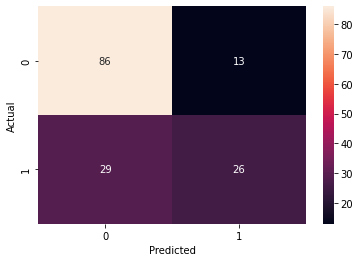

0.7272727272727273


In [37]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sn
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/inetguru/IDS-CB35533/main/pima_diabetes.csv')
print(data.head())
predictors = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
targets = 'Outcome'
train_data, test_data = train_test_split(data, train_size=0.8, random_state=1)
accuracy_table = dict()

model = linear_model.LogisticRegression()

for each_col in predictors:
  X = train_data[[each_col]]
  y = train_data['Outcome']

  X_test = test_data[[each_col]]
  y_test = test_data['Outcome']

  model.fit(X,y)
  y_pred = model.predict(X_test)
  if each_col == 'Glucose':
    print(f'Model intercept = {model.intercept_}, Model coef = {model.coef_}')

  accuracy_table[each_col] = metrics.accuracy_score(y_test, y_pred)
  
print(accuracy_table)

print("=======================================")
# Set predictors and target
predictor = ['Pregnancies', 'Glucose', 'Insulin']
X = train_data[predictor]

X_test = test_data[predictor]

model.fit(X.values,y)
y_pred = model.predict(X_test.values)
test_pred = model.predict([[10, 150, 10]])
print(test_pred)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

print(metrics.accuracy_score(y_test, y_pred))

# Generate a model instance for linear regression

# Perform Fit/Train, Check/print out the coefficients of your model


# Evaluate the model using the test data, Get r2 score.